In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
shampoo = pd.read_csv("shampoo_sales.csv")

In [16]:
shampoo = pd.read_csv("shampoo_sales.csv")

In [17]:
shampoo.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [18]:
type(shampoo)

pandas.core.frame.DataFrame

In [24]:
shampoo = pd.read_csv("shampoo_sales.csv",index_col=[0],parse_dates=True,squeeze=True)

In [25]:
shampoo.size

36

In [26]:
shampoo.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64

In [27]:
shampoo_ma = shampoo.rolling(window=10).mean()

<AxesSubplot:xlabel='Month'>

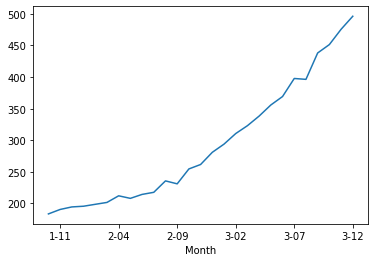

In [28]:
shampoo_ma.plot()

In [29]:
shampoo

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
1-06    168.5
1-07    231.8
1-08    224.5
1-09    192.8
1-10    122.9
1-11    336.5
1-12    185.9
2-01    194.3
2-02    149.5
2-03    210.1
2-04    273.3
2-05    191.4
2-06    287.0
2-07    226.0
2-08    303.6
2-09    289.9
2-10    421.6
2-11    264.5
2-12    342.3
3-01    339.7
3-02    440.4
3-03    315.9
3-04    439.3
3-05    401.3
3-06    437.4
3-07    575.5
3-08    407.6
3-09    682.0
3-10    475.3
3-11    581.3
3-12    646.9
Name: Sales, dtype: float64

In [32]:
shampoo_base = pd.concat([shampoo,shampoo.shift(1)],axis=1)

In [35]:
shampoo_base

,Sales,Sales
Month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3
1-07,231.8,168.5
1-08,224.5,231.8
1-09,192.8,224.5


In [37]:
shampoo_base.columns = ["Actual_Sales","Forecast_Sales"]

In [38]:
shampoo_base.head()

,Actual_Sales,Forecast_Sales
Month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3


In [39]:
shampoo_base.dropna(inplace=True)

In [40]:
shampoo_base.head()

,Actual_Sales,Forecast_Sales
Month,,
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3


In [41]:
shampoo_base.head()

,Actual_Sales,Forecast_Sales
Month,,
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3


In [44]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [45]:
shampoo_error = mean_squared_error(shampoo_base.Actual_Sales,shampoo_base.Forecast_Sales)

In [46]:
shampoo_error

11715.388285714285

In [48]:
np.sqrt(shampoo_error)

108.23764726616282

In [51]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

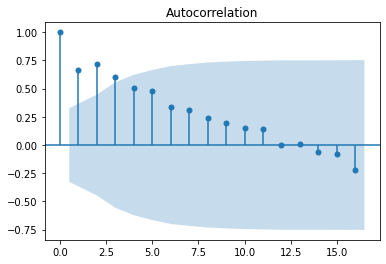

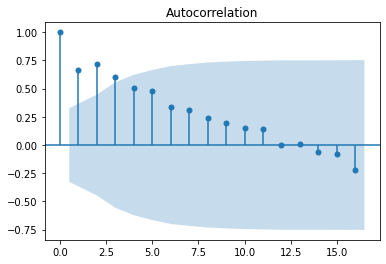

In [52]:
plot_acf(shampoo)

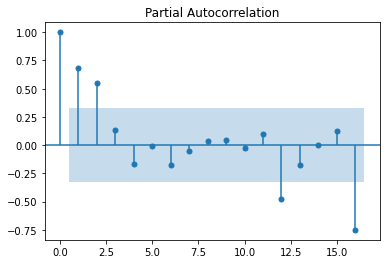

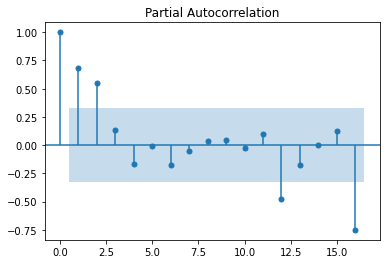

In [53]:
# Q -3

plot_pacf(shampoo)

In [54]:
from statsmodels.tsa.arima_model import ARIMA

In [55]:
shampoo_train = shampoo[0:25]
shampoo_test = shampoo[25:36]

In [57]:
shampoo_model = ARIMA(shampoo_train,order=(3,1,2))

In [63]:
shampoo_model_fit = shampoo_model.fit()

In [62]:
shampoo_model_fit.aic

272.3891948072046